In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Define samples for class w1 and w2
w1 = np.array([[4,2],[2,4],[2,3],[3,6],[4,4]])
w2 = np.array([[9,10],[6,8],[9,5],[8,7],[10,8]])

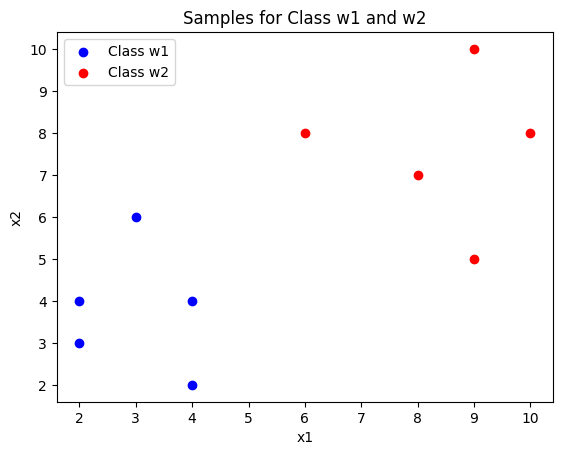

In [3]:
# Display samples in 2D space
plt.scatter(w1[:,0], w1[:,1], color='blue', label='Class w1')
plt.scatter(w2[:,0], w2[:,1], color='red', label='Class w2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Samples for Class w1 and w2')
plt.show()

In [4]:
# Step 2: Compute class mean values
mean_w1 = np.mean(w1, axis=0)
mean_w2 = np.mean(w2, axis=0)
mean_w1, mean_w2

(array([3. , 3.8]), array([8.4, 7.6]))

In [5]:
# Step 3: Compute covariance matrices
cov_w1 = np.cov(w1, rowvar=False)
cov_w2 = np.cov(w2, rowvar=False)
cov_w1, cov_w2

(array([[ 1.  , -0.25],
        [-0.25,  2.2 ]]),
 array([[ 2.3 , -0.05],
        [-0.05,  3.3 ]]))

In [6]:
# Step 4: Calculate Within-class scatter matrix SW
SW = cov_w1 + cov_w2
SW

array([[ 3.3, -0.3],
       [-0.3,  5.5]])

In [7]:
# Step 5: Calculate Between-class scatter matrix SB
mean_diff = (mean_w1 - mean_w2).reshape(-1,1)
SB = mean_diff @ mean_diff.T
SB

array([[29.16, 20.52],
       [20.52, 14.44]])

In [8]:
# Step 6: Perform LDA projection (SW^-1 SB)
from numpy.linalg import inv, eig
SW_inv = inv(SW)
lda_matrix = SW_inv @ SB
lda_matrix

array([[9.22126246, 6.48903654],
       [4.23388704, 2.97940199]])

In [9]:
# Step 7: Compute eigenvalues and eigenvectors
values, vectors = eig(lda_matrix)
values, vectors

(array([ 1.22006645e+01, -1.35428903e-16]),
 array([[ 0.90878558, -0.57549341],
        [ 0.41726342,  0.81780642]]))

In [10]:
# Step 8: Find the eigenvector with the largest eigenvalue
max_index = np.argmax(values)
w = vectors[:, max_index]
w

array([0.90878558, 0.41726342])

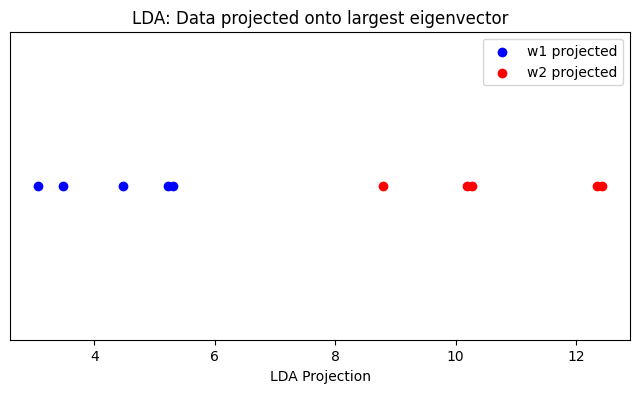

In [11]:
# Step 9: Project samples onto the largest eigenvector and visualize
w_norm = w / np.linalg.norm(w)  # Normalize for better scaling
proj_w1 = w_norm @ w1.T
proj_w2 = w_norm @ w2.T
plt.figure(figsize=(8,4))
plt.scatter(proj_w1, np.zeros_like(proj_w1), color='blue', label='w1 projected')
plt.scatter(proj_w2, np.zeros_like(proj_w2), color='red', label='w2 projected')
plt.xlabel('LDA Projection')
plt.yticks([])
plt.legend()
plt.title('LDA: Data projected onto largest eigenvector')
plt.show()